# Kiva Loan Dataset Exploration

importing necessary modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
kiva_loans_df = pd.read_csv("kiva_ds_csv/kiva_loans.csv")

In [3]:
kiva_loans_df.head()
#kiva_loans_df.shape

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


For categorical columns we use value_counts() to aggregate the number of times each value occurred. Then we will plot the frequency of top 50 country using simple barplot.

Philippines                             160441
Kenya                                    75825
El Salvador                              39875
Cambodia                                 34836
Pakistan                                 26857
Peru                                     22233
Colombia                                 21995
Uganda                                   20601
Tajikistan                               19580
Ecuador                                  13521
Paraguay                                 11903
Nicaragua                                11781
India                                    11237
Vietnam                                  10843
Nigeria                                  10136
Bolivia                                   8806
Lebanon                                   8792
Armenia                                   8631
Palestine                                 8167
Samoa                                     7396
Guatemala                                 7310
Rwanda       

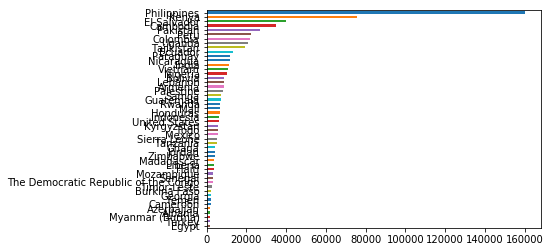

In [4]:
country_dist = kiva_loans_df['country'].value_counts().head(50) #this code creates a series where the index is the country name and their frequency are the values
print(country_dist)
kiva_loans_df['country'].value_counts().head(50).plot('barh').invert_yaxis() 

Countrywise distribution of loans using Plotly for an interactive graph

In [5]:
country_dist = kiva_loans_df['country'].value_counts().head(50)
trace = go.Bar(
    y=country_dist.index[::-1],
    x=country_dist.values[::-1],
    orientation = 'h',
    marker=dict(
        color=country_dist.values[::-1],
        colorscale = 'Viridis',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Country wise distribution of loans',
    width=700,
    height=1000,
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Country_Loan")

We can observe that Philippines has the highest number of loand followed by Kenya and Peru. Let's try to visualize it using the world map.

In [6]:
country_df = pd.DataFrame(kiva_loans_df['country'].value_counts()).reset_index()
country_df.columns = ['country', 'num_loans']
country_df = country_df.reset_index().drop('index', axis=1)

## I am using World Choropleth Map Code from plotly website: https://plot.ly/python/choropleth-maps/

data = [ dict(
        type = 'choropleth',
        locations = country_df['country'],
        locationmode = 'country names',
        z = country_df['num_loans'],
        text = country_df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = 'Number of Loand by Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='kiva-loans-world-map' )

Sectorwise Distribution of Loans

In [36]:
sector_srs = kiva_loans_df['sector'].value_counts().head(50)
trace = go.Bar(
    y=sector_srs.index[::-1],
    x=sector_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=sector_srs.values[::-1],
        colorscale = 'Rainbow',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Sector wise distribution of loans',
    width=700,
    height=1000,
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="SectorLoan")

We can observe that Agriculture has the highest number of loans followed by food and retail. Now let us look at the activity level distribution of loans.

In [38]:
activity_srs = kiva_loans_df['activity'].value_counts().head(20)
trace = go.Bar(
    y=activity_srs.index[::-1],
    x=activity_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=activity_srs.values[::-1],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Activity wise distribution of loans',
    width=700,
    height=1000,
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivityLoan")

Now let us see distibution of activities falling under the sector agriculture

In [66]:
sector_agriculture_df = kiva_loans_df.loc[kiva_loans_df.sector == "Agriculture"]
len(kiva_loans_df.sector.value_counts())

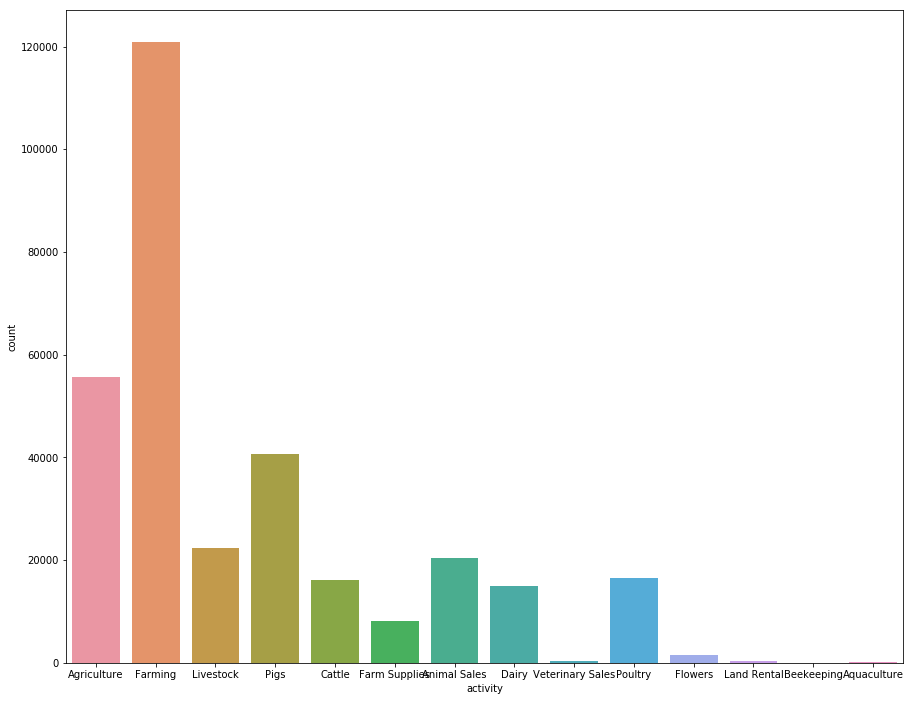

In [74]:
plt.figure(figsize=(15,12))
sns.countplot(sector_agriculture_df.activity)
plt.show()

In [67]:
sector_agriculture_srs = sector_agriculture_df['activity'].value_counts()
trace = go.Bar(
    y=sector_agriculture_srs.index[::-1],
    x=sector_agriculture_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=sector_agriculture_srs.values[::-1],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Activity distribution of loans for Agriculture sector',
    width=700,
    height=1000,
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="AgricultureActivityLoan")

Loan Amount & Funded Amunt:

We will see the distribution of loan and funded amount. Before that, we will also check for outliers in the column using a scatter pliot.

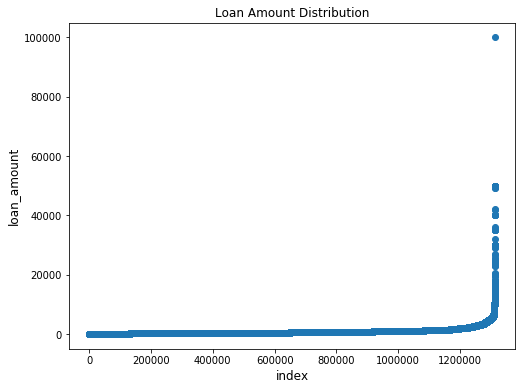

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(range(kiva_loans_df.shape[0]), np.sort(kiva_loans_df.loan_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

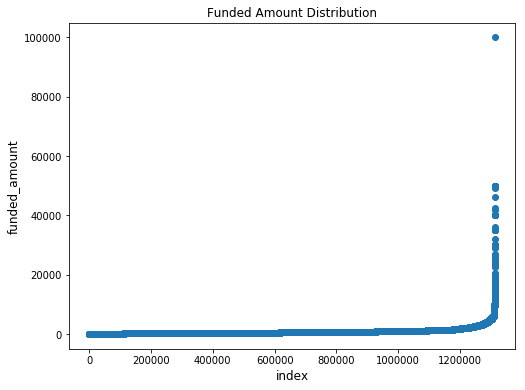

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(range(kiva_loans_df.shape[0]), np.sort(kiva_loans_df.funded_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('funded_amount', fontsize=12)
plt.title("Funded Amount Distribution")
plt.show()

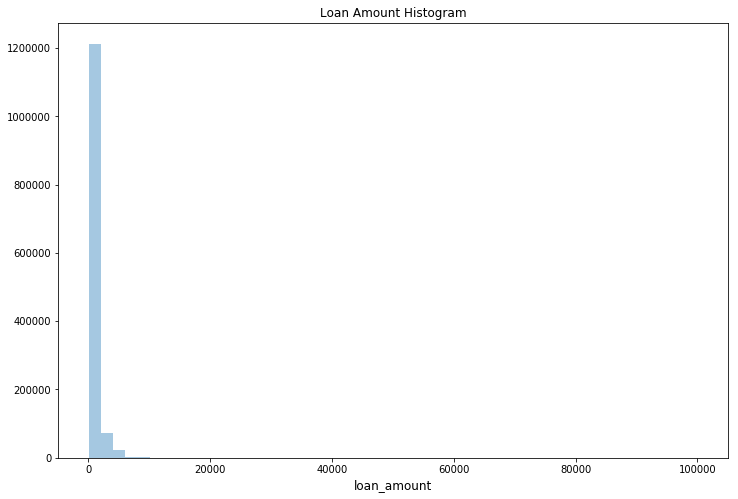

In [47]:
plt.figure(figsize=(12,8))
sns.distplot(kiva_loans_df.loan_amount.values, bins=50, kde=False)
plt.xlabel('loan_amount', fontsize=12)
plt.title("Loan Amount Histogram")
plt.show()

The above plot is not very clear so let's truncate the outlier and see if that changes anything

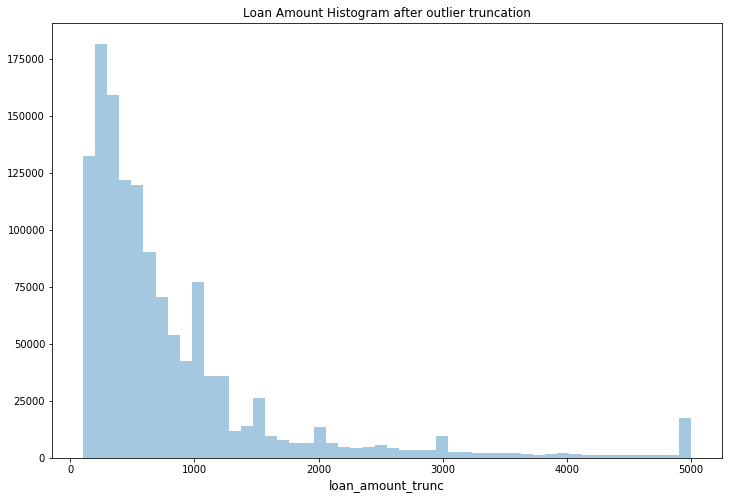

In [48]:
ulimit = np.percentile(kiva_loans_df.loan_amount.values, 99)
llimit = np.percentile(kiva_loans_df.loan_amount.values, 1)
kiva_loans_df['loan_amount_trunc'] = kiva_loans_df['loan_amount'].copy()
kiva_loans_df['loan_amount_trunc'].loc[kiva_loans_df['loan_amount']>ulimit] = ulimit
kiva_loans_df['loan_amount_trunc'].loc[kiva_loans_df['loan_amount']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(kiva_loans_df.loan_amount_trunc.values, bins=50, kde=False)
plt.xlabel('loan_amount_trunc', fontsize=12)
plt.title("Loan Amount Histogram after outlier truncation")
plt.show()

This goves us a clearer distribution and indicates that majority of the loan falls under 1000 sub category

Now we will see the distribution of Repayment Terms

In [50]:
repayment_terms_srs = kiva_loans_df['term_in_months'].value_counts()
trace = go.Bar(
    y=repayment_terms_srs.index,
    x=repayment_terms_srs.values,
    orientation = 'h',
    marker=dict(
        color=repayment_terms_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Repayment Terms in Months',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="RepaymentIntervals")

This indicates that 14 months is the most common repayment interval for these loans followed by 9 months. In the next section we will check the frequency distribution of the repayment interval at which lenders are supposed to receive the installments.

In [51]:
repayment_interval_srs = kiva_loans_df['repayment_interval'].value_counts()
trace = go.Bar(
    y=repayment_interval_srs.index,
    x=repayment_interval_srs.values,
    orientation = 'h',
    marker=dict(
        color=repayment_interval_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Frequency Distribution of Repayment Interval',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="RepaymentIntervals")

This indicates that most of the loan have monthly installment followed by irregular intervals

The lender_count column indicates that there are more than one lenders contributing towards the loan. Let's see the frequency distribution of lender_count

In [52]:
lender_count_srs = kiva_loans_df.lender_count.value_counts()

trace = go.Bar(
    x=lender_count_srs.index,
    y=lender_count_srs.values,
    marker=dict(
        color=lender_count_srs.values,
        colorscale = 'Portland',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Lender Count'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LenderCount")

This distribution is highly skewed and we can see that there are few loans with more than 200 lenders. We can leave the putliers and check only to the loans on the left of the graph

In [53]:
lender_count_srs = kiva_loans_df.lender_count.value_counts().head(100)

trace = go.Bar(
    x=lender_count_srs.index,
    y=lender_count_srs.values,
    marker=dict(
        color=lender_count_srs.values,
        colorscale = 'Portland',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Lender Count'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LenderCount")

In this section, we will see the gender distribution of the borrowers

In [54]:
olist = []
for ll in kiva_loans_df["borrower_genders"].values:
    if str(ll) != "nan":
        olist.extend( [l.strip() for l in ll.split(",")] )
temp_series = pd.Series(olist).value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Borrower Gender'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

This is very different than expected. I expected male to be the major brrowers but the pie chart indicates that 80% of the borrowers are female

# MPI: Multi Dimensional Poverty Index

Multidimensional poverty measures can be used to create a more comprehensive picture. They reveal who is poor and how they are poor – the range of different disadvantages they experience. As well as providing a headline measure of poverty, multidimensional measures can be broken down to reveal the poverty level in different areas of a country, and among different sub-groups of people.

We have been provided with the MPI value for different regions. We will plot these values on a map to give us a better overview of these MPI values. 

In [55]:
kiva_mpi_df = pd.read_csv("kiva_ds_csv/kiva_mpi_region_locations.csv")
kiva_mpi_df.shape

(2772, 9)

In [56]:
kiva_mpi_df.head(50)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
5,"Daykundi, Afghanistan",AFG,Afghanistan,Daykundi,South Asia,0.313,"(33.669495, 66.0463534)",33.669495,66.046353
6,"Farah, Afghanistan",AFG,Afghanistan,Farah,South Asia,0.319,"(32.4464635, 62.1454133)",32.446464,62.145413
7,"Faryab, Afghanistan",AFG,Afghanistan,Faryab,South Asia,0.250,"(36.0795613, 64.90595499999999)",36.079561,64.905955
8,"Ghazni, Afghanistan",AFG,Afghanistan,Ghazni,South Asia,0.245,"(33.5450587, 68.4173972)",33.545059,68.417397
9,"Ghor, Afghanistan",AFG,Afghanistan,Ghor,South Asia,0.384,"(34.0995776, 64.90595499999999)",34.099578,64.905955


In [57]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        lon = kiva_mpi_df['lon'],
        lat = kiva_mpi_df['lat'],
        text = kiva_mpi_df['LocationName'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = kiva_mpi_df['MPI'],
            cmax = kiva_mpi_df['MPI'].max(),
            colorbar=dict(
                title="Multi-dimenstional Poverty Index"
            )
        ))]

layout = dict(
        title = 'Multi-dimensional Poverty Index for different regions',
        colorbar = True,
        geo = dict(
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            #countrywidth = 0.5,
            #subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

To have a better understanding between the MPI index and poverty, we will look at the GDP of every country in the world. I have downloaded the data from World Bank website and the GDP values are in US $ and contains values for the year 2016. https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [60]:
country_GDP_df = pd.read_csv("kiva_ds_csv/GDP_Current_US_2016.csv", engine="python")
country_GDP_df.head(20)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,GDP_2016
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1.946902e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,9.533511e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.186387e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,2.858518e+09
5,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,2.504700e+12
6,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,3.487430e+11
7,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,5.454760e+11
8,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,1.057230e+10
9,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,6.580000e+08


In [61]:
data = [ dict(
        type = 'choropleth',
        locations = country_GDP_df['Country_Name'],
        locationmode = 'country names',
        z = country_GDP_df['GDP_2016'],
        text = country_GDP_df['Country_Name'],
    
        colorscale = [[0.0, 'rgb(242,240,247)'],[0.03, 'rgb(218,218,235)'],[0.06, 'rgb(188,189,220)'],\
            [0.1, 'rgb(158,154,200)'],[0.15, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'GDP per capita'),
      ) ]

layout = dict(
    title = 'GDP per capita by Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='gdp-world-map')

Data Cleaning: This dataset was not very messy to bein with. 